# Principal Component Analysis Assignment

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [3]:
data = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv"
)

<IPython.core.display.Javascript object>

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [5]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

<IPython.core.display.Javascript object>

In [8]:
X = data.select_dtypes(include="number")
y = data["pitchType"]

<IPython.core.display.Javascript object>

In [34]:
X = X.dropna()
X = X.drop(columns=["batterId", "pitcherId", "catcherId", "umpireId"])

<IPython.core.display.Javascript object>

In [74]:
y = y.iloc[X.index]

<IPython.core.display.Javascript object>

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [35]:
scaler = StandardScaler()

X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_std

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
0,-1.513389,-1.105556,1.158968,-1.160907,-0.762459,0.660713,1.382435,-0.144178,0.222890,0.810957,-0.129126,-0.659660,0.924665,0.912569,1.161476
1,-1.513389,-1.105556,1.158968,0.062452,-0.762459,-1.279673,1.698944,-0.419166,0.356932,-0.231292,-1.595620,-1.132326,0.549776,-0.649996,-0.820546
2,-1.513389,-0.108612,-0.082995,1.285810,-0.762459,0.588735,1.347267,-0.816327,0.302882,-0.360916,-0.613279,-0.783965,0.553873,-1.337017,-1.059600
3,-1.513389,-0.108612,-0.082995,-1.160907,-0.762459,0.015917,0.679082,0.774600,-0.768952,-0.786574,-0.844831,1.537931,1.121328,-1.270671,0.513220
4,-1.513389,0.888332,1.158968,-1.160907,-0.762459,0.678707,0.608747,0.448632,-0.803377,-1.037064,0.574300,1.132789,0.834528,-0.021345,0.985823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13433,1.179581,-0.108612,-1.324958,0.062452,-0.762459,-0.083052,-0.797958,-4.572501,-1.285412,0.973863,-1.334247,0.698488,-0.824818,1.315355,-1.503402
13434,1.179581,-0.108612,1.158968,1.285810,-0.762459,-2.242368,-0.815542,-5.006514,-0.914831,2.536361,-1.888568,0.489778,-0.677321,0.506520,-0.988336
13435,1.564291,-1.105556,1.158968,-1.160907,-0.762459,-1.351650,-0.129773,-3.942950,-0.957570,1.219099,1.419815,0.703092,-0.480658,-3.912530,-1.406581
13436,1.564291,-0.108612,1.158968,0.062452,-0.762459,-2.113409,-0.411114,-5.028078,-1.308696,2.193032,-0.415057,0.566510,-0.900616,1.077889,-1.675320


<IPython.core.display.Javascript object>

In [54]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(X_std)
pc_df = pd.DataFrame(pcs)
pc_df

,0,1,2,3,4
0,-1.333228,-0.994247,0.389736,0.474908,-0.862031
1,-1.130163,1.454090,0.590936,1.905994,0.992146
2,-1.397807,0.598976,-0.080410,0.421266,1.122994
3,0.277755,-1.146580,-0.022014,0.122933,2.009684
4,-0.107924,-1.558425,1.373204,-0.934450,1.028121
...,...,...,...,...,...
13433,1.660759,1.683692,-1.032662,1.381107,-2.280506
13434,2.265308,2.650734,1.183877,2.160482,-2.498047
13435,1.196673,1.407200,0.022789,0.376533,2.237838
13436,2.061638,2.080009,1.218267,2.359507,-2.278511


<IPython.core.display.Javascript object>

In [67]:
# sns.scatterplot("pc1", "pc2", data=pc_df)

<IPython.core.display.Javascript object>

### Compute the explained variance for new data set.

In [56]:
pca_expl = pca.explained_variance_ratio_
pca_expl

array([0.1591655 , 0.10825072, 0.09564353, 0.07848883, 0.07189134])

<IPython.core.display.Javascript object>

### Generate a scatter plot that visualizes how the component values are distributed.

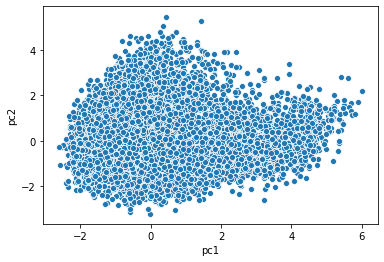

<IPython.core.display.Javascript object>

In [39]:
# sns.scatterplot("pc1", "pc2", data=pc_df)

### Create a line plot that shows the explained variance by number of components.

In [57]:
pca_cumsum = np.cumsum(pca_expl)

<IPython.core.display.Javascript object>

In [58]:
pca_cumsum.shape

(5,)

<IPython.core.display.Javascript object>

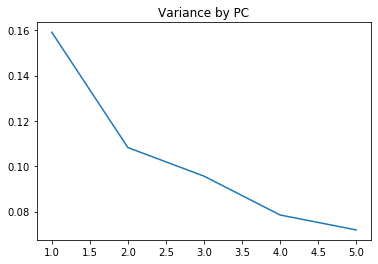

<IPython.core.display.Javascript object>

In [61]:
sns.lineplot(x=np.arange(1, len(pca_cumsum) + 1), y=pca_expl)
plt.title("Variance by PC")
plt.show()

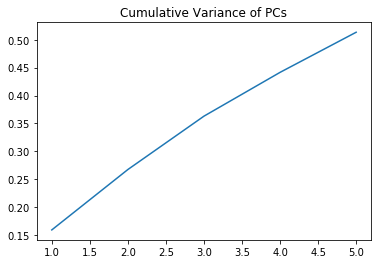

<IPython.core.display.Javascript object>

In [63]:
sns.lineplot(x=np.arange(1, len(pca_cumsum) + 1), y=pca_cumsum)
plt.title("Cumulative Variance of PCs")
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [69]:
model = RandomForestClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

In [65]:
len(X_std.columns)

15

<IPython.core.display.Javascript object>

In [75]:
num_pcs = np.arange(1, len(X_std.columns) + 1)
scores = []
num_comps = []

for pc in num_pcs:
    pca = PCA(n_components=pc)
    X_pcs = pca.fit_transform(X_std)

    model.fit(X_pcs, y)
    score = model.score(X_pcs, y)
    scores.append(score)
    num_comps.append(pc)

<IPython.core.display.Javascript object>

### Create a line plot that shows the training scores across the different numbers of principal components.

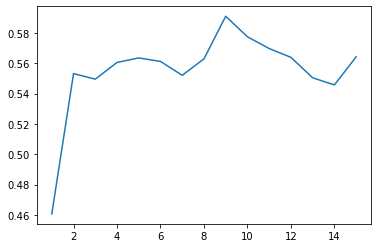

<IPython.core.display.Javascript object>

In [76]:
sns.lineplot(x=num_comps, y=scores)

### Based on the analysis you conducted, what is the optimal number of principal components?

In [ ]:
# 9 pc's has the best score overall, 2 may be the most efficient option 